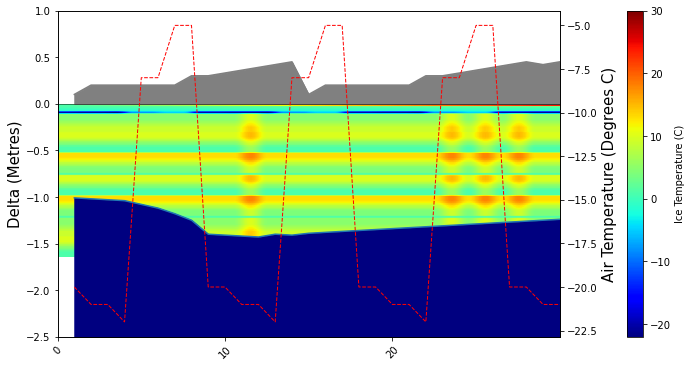

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import os

# read in 'fake' dataset
time_thickness=pd.read_csv('Buoy_Example.csv')


#create plot
fig = plt.figure(figsize=(12,6))
        
ax1 = fig.add_subplot(1, 1, 1)  




#create the ocean and snow color fill-ins
plt.plot(time_thickness.Date, time_thickness.Ice_Bottom)
plt.plot(time_thickness.Date, time_thickness.Snow_Depth,color="grey")

plt.fill_between(time_thickness.Date,time_thickness.Ice_Bottom,-3,color="navy")
plt.fill_between(time_thickness.Date,0,time_thickness.Snow_Depth,color="grey")



########
#important
########

#filter the dataset so you only have temp columns (in the fake dataset I take the last 84 cols, if you have issues let me know)
#once filtered, create a new dataset using only these columns (called temps) and transpose 'flip' the dataset (using .T)
temps = time_thickness[time_thickness.columns[-84:]].T

#create an imshow plot (kind of like an image, consisting of a square of the colours from temps, the shape of the square is the 
#vertical length of the dataset 0 to (len(time_thickness))) and the vertical length of the number of thermistors (the thermistors are)
# 5cm apart if i remember correctly so divide by 50 (50 in 1metre)
# this might not be correct by the way, but im pretty sure it is

plt.imshow(temps, cmap='jet', extent=[0, len(time_thickness), -len(temps)/50, 0],
                   aspect='auto', zorder=0)
plt.colorbar(label='Ice Temperature (C)', pad=0.1)


# everything else after this is the same but i took out the old legend to get the colourbar legend in

time_thickness_drops=time_thickness.drop_duplicates(subset =["Date"], keep = "first")
datelen=time_thickness_drops.Date.tolist()
datelenfull=time_thickness.Date.tolist()


ax1.set(xticks=range(0, len(datelen), 10))
ax1.set_ylabel("Delta (Metres)",fontsize=15)
plt.xticks(rotation=45)
plt.ylim([-2.5, 1])

plt.xlim([0,len(datelen)])
plt.axhline(y=0,color="black",linewidth=0.5)




ax2 = ax1.twinx() 
ax2.plot(time_thickness.Date, time_thickness["Air_Temp_(C)"],color="red",linewidth=1,ls="dashed")
#ax2.set(xticks=[0,20, 40, 60, 80, 100, 120, 140])
ax2.set(xticks=range(0, len(datelen), 10))
ax2.set_ylabel("Air Temperature (Degrees C)",fontsize=15)


'''

legend_elements = [Line2D([0], [0], color='grey', lw=3, label='Snow Line'),
                   Patch(facecolor='azure',edgecolor='black',label='Ice'),
                   Patch(facecolor='navy', edgecolor='black',label='Ocean'),
                   Line2D([0], [0], color='red', lw=3, linestyle="--", label='Air Temp')]

ax1.legend(handles=legend_elements, loc='center',bbox_to_anchor=(1.175, 0.5),labelspacing=2)


'''



#plt.savefig(path +"\\" + str(buoy_id) + "_plot", bbox_inches='tight')
#time_thickness.to_csv(path +"\\" + str(buoy_id) + "dT120_thickness_data.csv",index=False)

plt.show()